<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Exploratory Data Analysis of Raw Data</h4>
    <p style="font-size: 20px;">NBA API Data (1984-2024)</p>
</div>

<a name="EDA"></a>

# Table of Contents

[Setup](#Setup)
  
**[1. Team Box Scores](#1.-Team-Box-Scores)**

- [1.1. Descriptives](#1.1.-Descriptives)

- [1.2. Univariate EDA](#1.2.-Univariate-EDA)

- [1.3. Multivariate EDA](#1.3.-Multivariate-EDA)

**[2. Player Box Scores](#2.-Player-Box-Scores)**

- [2.1. Descriptives](#2.1.-Descriptives)

- [2.2. Univariate EDA](#2.2.-Univariate-EDA)

- [2.3. Multivariate EDA](#2.3.-Multivariate-EDA)

# Setup

[Return to top](#EDA)

In [104]:
# basic modules
import os
import time
import random as rn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# plotting style
plt.style.use('seaborn-v0_8-notebook')
sns.set_style('white')
#sns.set_style('darkgrid')

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# warnings
import warnings
warnings.filterwarnings("ignore")

# user defined functions
import utility_functions as utl

In [3]:
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30752 entries, 0 to 30751
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           30752 non-null  int64 
 1   date             30752 non-null  object
 2   start_time       30752 non-null  object
 3   home_team        30752 non-null  object
 4   away_team        30752 non-null  object
 5   home_team_score  30752 non-null  int64 
 6   away_team_score  30752 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [4]:
schedule_df.head()

,season,date,start_time,home_team,away_team,home_team_score,away_team_score
0,2000,1999-11-02,1999-11-02 05:00:00+00:00,Charlotte Hornets,Orlando Magic,100,86
1,2000,1999-11-02,1999-11-02 05:00:00+00:00,Dallas Mavericks,Golden State Warriors,108,96
2,2000,1999-11-02,1999-11-02 05:00:00+00:00,Denver Nuggets,Phoenix Suns,107,102
3,2000,1999-11-02,1999-11-02 05:00:00+00:00,Houston Rockets,Milwaukee Bucks,93,98
4,2000,1999-11-02,1999-11-02 05:00:00+00:00,Los Angeles Clippers,Seattle Supersonics,92,104


In [5]:
schedule_df.describe()

,season,home_team_score,away_team_score
count,30752.000,30752.000,30752.000
mean,2011.483,102.942,99.994
std,6.902,13.403,13.520
min,2000.000,56.000,53.000
25%,2006.000,94.000,91.000
50%,2011.000,103.000,99.000
75%,2017.000,112.000,109.000
max,2023.000,175.000,176.000


<a name="1.-Team-Box-Scores"></a>
# 1. Team Box Scores

[Return to top](#EDA)

In [105]:
team_bs_df = pd.read_csv('../data/original/nba_games_1984_2024.csv')

<a name="1.1.-Descriptives"></a>
## 1.1. Descriptives

[Return to top](#EDA)

In [106]:
team_bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104437 entries, 0 to 104436
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEASON_ID          104437 non-null  int64  
 1   TEAM_ID            104437 non-null  int64  
 2   TEAM_ABBREVIATION  104437 non-null  object 
 3   TEAM_NAME          104437 non-null  object 
 4   GAME_ID            104437 non-null  int64  
 5   GAME_DATE          104437 non-null  object 
 6   MATCHUP            104437 non-null  object 
 7   WL                 104427 non-null  object 
 8   MIN                104437 non-null  int64  
 9   PTS                104437 non-null  int64  
 10  FGM                104437 non-null  int64  
 11  FGA                104437 non-null  int64  
 12  FG_PCT             104430 non-null  float64
 13  FG3M               104437 non-null  int64  
 14  FG3A               104435 non-null  float64
 15  FG3_PCT            103394 non-null  float64
 16  FT

In [107]:
team_bs_df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,21983,1610612737,ATL,Atlanta Hawks,28300005,10/28/83,ATL @ NJN,L,240,108,41,90,0.456,0,0.0,NaN,26,38,0.684,15.0,18.0,33.0,14,10.0,5,17,30,NaN
1,21983,1610612737,ATL,Atlanta Hawks,28300014,10/29/83,ATL vs. DET,W,240,117,49,94,0.521,0,1.0,0.0,19,30,0.633,27.0,21.0,48.0,28,14.0,7,23,35,NaN
2,21983,1610612737,ATL,Atlanta Hawks,28300027,11/1/83,ATL vs. WAS,W,240,95,38,81,0.469,0,0.0,NaN,19,30,0.633,12.0,29.0,41.0,20,7.0,10,16,34,NaN
3,21983,1610612737,ATL,Atlanta Hawks,28300041,11/4/83,ATL vs. CHI,W,240,103,42,86,0.488,1,1.0,1.0,18,26,0.692,19.0,27.0,46.0,31,14.0,13,18,27,NaN
4,21983,1610612737,ATL,Atlanta Hawks,28300058,11/6/83,ATL @ MIL,L,240,84,32,78,0.410,0,2.0,0.0,20,30,0.667,11.0,26.0,37.0,18,4.0,5,14,24,NaN


In [108]:
team_bs_df.describe()

,SEASON_ID,TEAM_ID,GAME_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
count,104437.000,1.044e+05,1.044e+05,104437.000,104437.000,104437.000,104437.000,104430.000,104437.000,104435.000,103394.000,104437.000,104437.000,104427.000,104433.000,104433.000,104436.000,104437.000,104435.000,104437.000,104437.000,104437.000,74733.000
mean,22865.456,1.611e+09,5.920e+07,240.405,102.047,38.310,83.387,0.460,6.236,17.717,0.339,19.190,25.396,0.756,11.886,30.690,42.578,22.773,7.910,4.993,14.600,22.003,0.039
std,5196.852,8.569e+00,2.228e+08,12.328,14.000,6.028,8.843,0.059,4.426,10.693,0.153,6.628,8.211,0.100,4.358,5.676,6.834,5.654,3.062,2.655,4.248,4.876,13.746
min,12003.000,1.611e+09,1.030e+07,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-73.000
25%,21993.000,1.611e+09,2.090e+07,240.000,93.000,34.000,78.000,0.420,3.000,10.000,0.250,14.000,20.000,0.692,9.000,27.000,38.000,19.000,6.000,3.000,12.000,19.000,-9.000
50%,22005.000,1.611e+09,2.200e+07,240.000,102.000,38.000,83.000,0.459,6.000,16.000,0.333,19.000,25.000,0.762,11.000,31.000,42.000,23.000,8.000,5.000,14.000,22.000,0.800
75%,22015.000,1.611e+09,2.920e+07,240.000,111.000,42.000,89.000,0.500,9.000,24.000,0.429,23.000,31.000,0.824,15.000,34.000,47.000,26.000,10.000,7.000,17.000,25.000,9.000
max,62023.000,1.611e+09,1.622e+09,688.000,186.000,74.000,136.000,0.833,29.000,70.000,2.000,61.000,80.000,1.000,44.000,60.000,81.000,52.000,27.000,23.000,40.000,52.000,73.000


In [109]:
# missing values table
utl.get_missing_values(team_bs_df)

,Missing Values,% of Total Values
PLUS_MINUS,29704,28.4
FG3_PCT,1043,1.0
WL,10,0.0
FT_PCT,10,0.0
FG_PCT,7,0.0
OREB,4,0.0
DREB,4,0.0
FG3A,2,0.0
STL,2,0.0
REB,1,0.0


<a name="1.2.-Univariate-EDA"></a>
## 1.2. Univariate EDA

[Return to top](#EDA)

In [124]:
# get numeric variables
num_vars_team_bs = team_bs_df.select_dtypes(include=['int64', 'float64']).columns
# filter out columns that end with '_ID'
num_vars_team_bs = [col for col in num_vars_team_bs if not col.endswith('_ID')]
print('Number of numeric variables:', len(num_vars_team_bs))

Number of numeric variables: 20


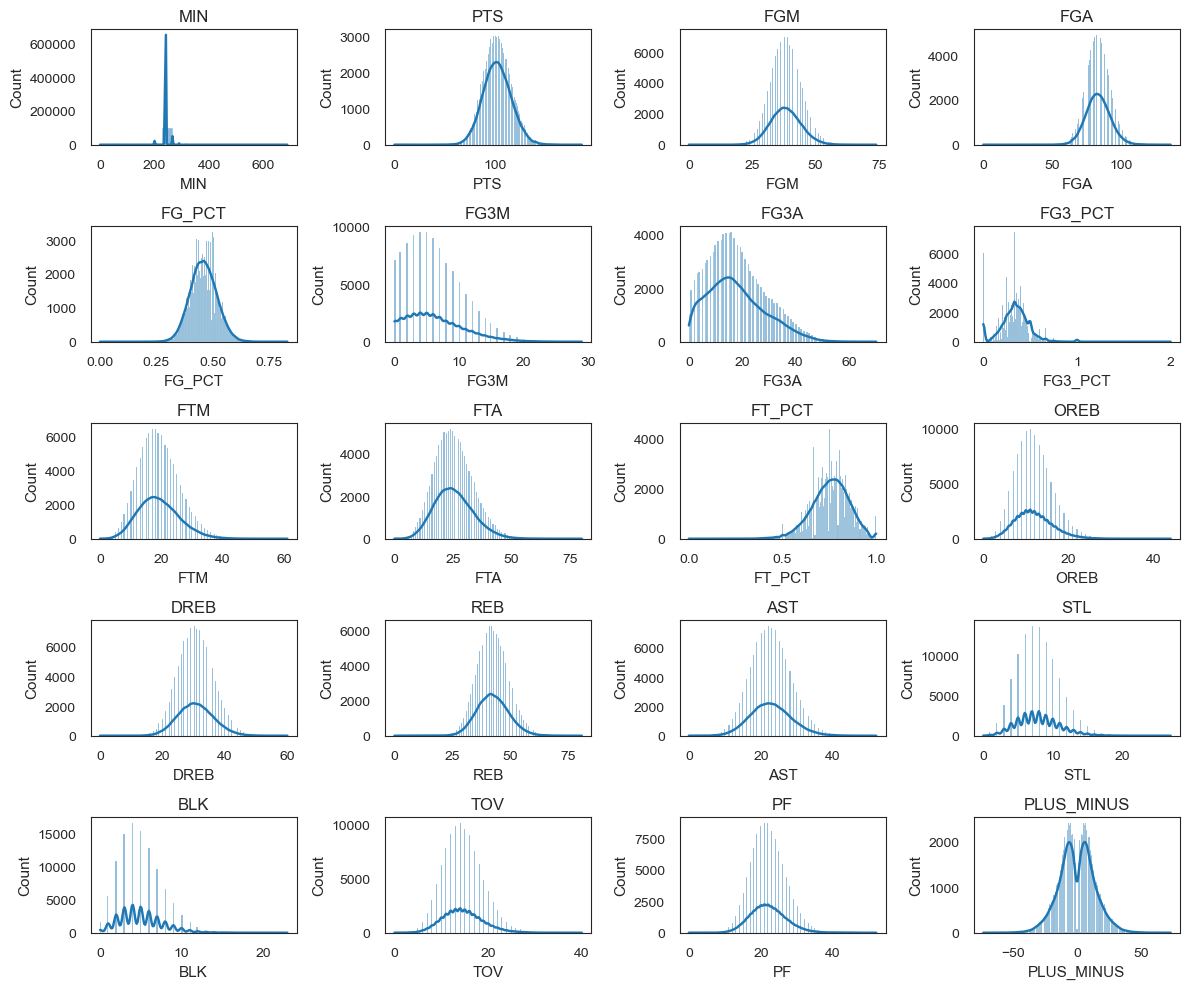

In [138]:
# histograms for each numeric column
fig, axes = plt.subplots(5, 4, figsize=(12, 10))
for ax, column in zip(axes.flatten(), num_vars_team_bs):
    sns.histplot(team_bs_df[column], kde=True, ax=ax) 
    ax.set_title(f'{column}')
plt.tight_layout();

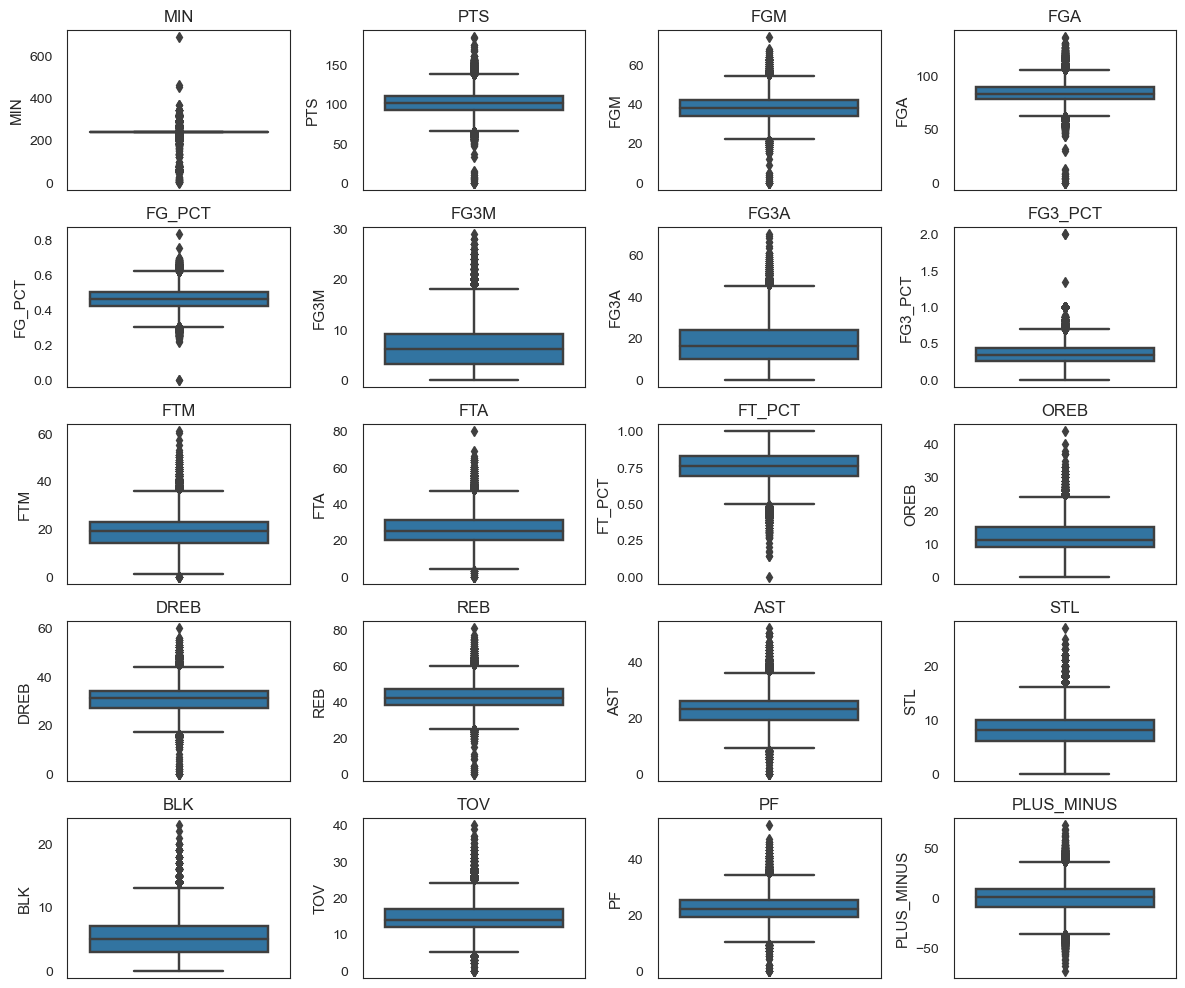

In [139]:
# boxplots for each numeric column
fig, axes = plt.subplots(5, 4, figsize=(12, 10))
for ax, column in zip(axes.flatten(), num_vars_team_bs):
    sns.boxplot(y=column, data=team_bs_df, ax=ax)
    ax.set_title(f'{column}')
plt.tight_layout();

<a name="1.3.-Multivariate-EDA"></a>
## 1.3. Multivariate EDA

[Return to top](#EDA)

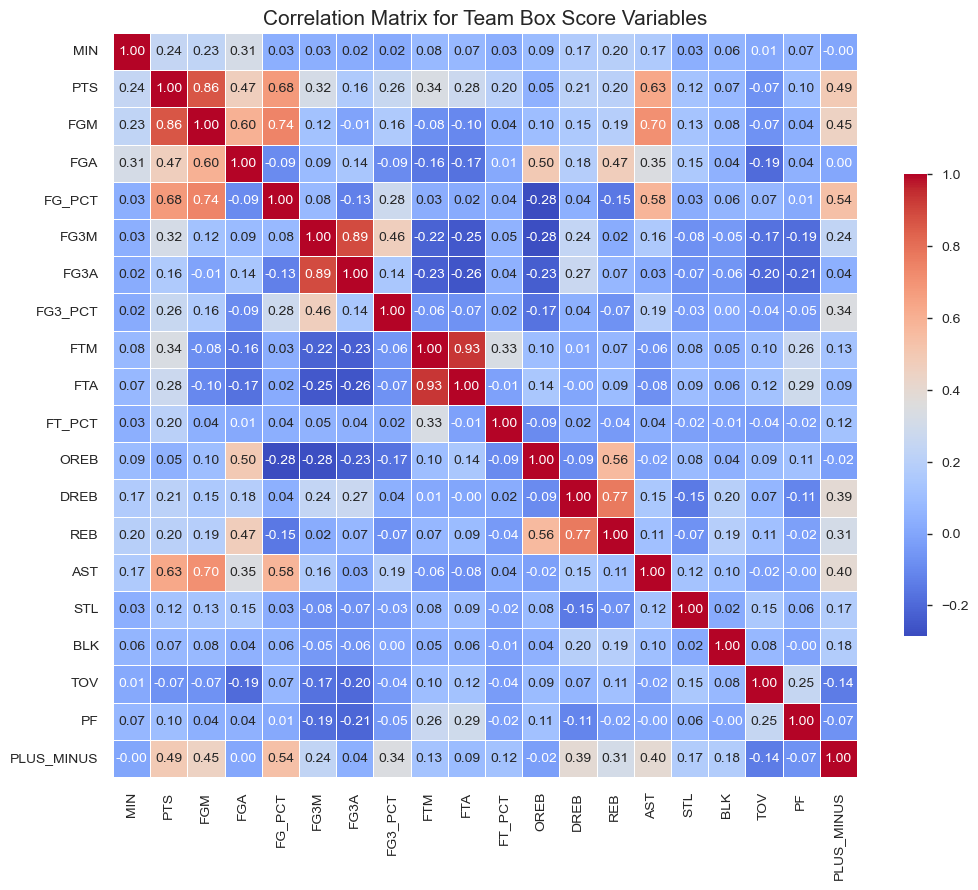

In [140]:
# correlations
plt.figure(figsize=(12, 12))
sns.heatmap(team_bs_df[num_vars_team_bs].corr(), annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for Team Box Score Variables', fontsize=15);

<a name="2.-Player-Box-Scores"></a>
# 2. Player Box Scores

[Return to top](#EDA)

In [118]:
player_bs_df = pd.read_csv('../data/original/nba_players_statistics_1946_2024.csv')

<a name="2.1.-Descriptives"></a>
## 2.1. Descriptives

[Return to top](#EDA)

In [119]:
player_bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29746 entries, 0 to 29745
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_ID          29746 non-null  int64  
 1   SEASON_ID          29746 non-null  object 
 2   LEAGUE_ID          29746 non-null  int64  
 3   TEAM_ID            29746 non-null  int64  
 4   TEAM_ABBREVIATION  29738 non-null  object 
 5   PLAYER_AGE         29746 non-null  float64
 6   GP                 29746 non-null  int64  
 7   GS                 23264 non-null  float64
 8   MIN                28977 non-null  float64
 9   FGM                29746 non-null  int64  
 10  FGA                29746 non-null  int64  
 11  FG_PCT             29732 non-null  float64
 12  FG3M               23713 non-null  float64
 13  FG3A               23713 non-null  float64
 14  FG3_PCT            23491 non-null  float64
 15  FTM                29746 non-null  int64  
 16  FTA                297

In [120]:
player_bs_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,76001,1990-91,0,1610612757,POR,23.0,43,0.0,290.0,55,116,0.474,0.0,0.0,0.0,25,44,0.568,27.0,62.0,89.0,12,4.0,12.0,22.0,39,135
1,76001,1991-92,0,1610612757,POR,24.0,71,1.0,934.0,178,361,0.493,0.0,0.0,0.0,76,101,0.752,81.0,179.0,260.0,30,25.0,16.0,66.0,132,432
2,76001,1992-93,0,1610612749,MIL,25.0,12,0.0,159.0,26,56,0.464,0.0,1.0,0.0,12,16,0.750,12.0,25.0,37.0,10,6.0,4.0,13.0,24,64
3,76001,1992-93,0,1610612738,BOS,25.0,63,52.0,1152.0,219,417,0.525,0.0,0.0,0.0,76,100,0.760,114.0,186.0,300.0,17,19.0,22.0,84.0,165,514
4,76001,1992-93,0,0,TOT,25.0,75,52.0,1311.0,245,473,0.518,0.0,1.0,0.0,88,116,0.759,126.0,211.0,337.0,27,25.0,26.0,97.0,189,578


In [121]:
player_bs_df.describe()

,PLAYER_ID,LEAGUE_ID,TEAM_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
count,2.975e+04,29746.0,2.975e+04,29746.000,29746.000,23264.000,28977.000,29746.000,29746.000,29732.000,23713.000,23713.000,23491.000,29746.000,29746.000,29627.000,25583.000,25583.000,29089.000,29746.00,25583.000,25583.000,24431.000,29746.000,29746.00
mean,2.393e+05,0.0,1.474e+09,26.982,48.728,22.533,1146.357,186.403,411.776,0.429,26.392,74.893,0.223,95.635,127.474,0.695,57.354,142.402,212.770,109.61,37.508,23.107,68.840,108.933,489.48
std,4.858e+05,0.0,4.480e+08,3.943,26.518,27.889,924.313,183.230,388.147,0.106,42.560,112.993,0.184,109.721,141.224,0.197,64.644,142.773,220.939,131.98,37.132,34.887,65.799,82.815,482.50
min,2.000e+00,0.0,0.000e+00,15.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00
25%,1.863e+03,0.0,1.611e+09,24.000,25.000,0.000,295.000,37.000,90.000,0.390,0.000,2.000,0.000,16.000,23.000,0.643,11.000,31.000,46.000,17.00,8.000,3.000,15.000,34.000,98.00
50%,7.710e+04,0.0,1.611e+09,26.000,54.000,7.000,972.000,131.000,300.000,0.438,4.000,17.000,0.273,57.000,79.000,0.740,34.000,102.000,149.000,63.00,27.000,11.000,50.000,98.000,342.00
75%,2.012e+05,0.0,1.611e+09,30.000,74.000,41.000,1869.000,284.000,632.000,0.481,37.000,108.000,0.358,138.000,186.000,0.810,82.000,207.000,303.000,152.00,56.000,28.000,104.000,171.000,746.00
max,1.642e+06,0.0,1.611e+09,50.000,88.000,83.000,3882.000,1597.000,3159.000,1.000,402.000,1028.000,1.000,840.000,1363.000,1.000,587.000,1111.000,2149.000,1164.00,301.000,456.000,464.000,386.000,4029.00


In [123]:
# missing values table
utl.get_missing_values(player_bs_df)

,Missing Values,% of Total Values
GS,6482,21.8
FG3_PCT,6255,21.0
FG3M,6033,20.3
FG3A,6033,20.3
TOV,5315,17.9
OREB,4163,14.0
DREB,4163,14.0
STL,4163,14.0
BLK,4163,14.0
MIN,769,2.6


<a name="2.2.-Univariate-EDA"></a>
## 2.2. Univariate EDA

[Return to top](#EDA)

In [128]:
# get numeric variables
num_vars_player_bs = player_bs_df.select_dtypes(include=['int64', 'float64']).columns
# filter out columns that end with '_ID'
num_vars_player_bs = [col for col in num_vars_player_bs if not col.endswith('_ID')]
print('Number of numeric variables:', len(num_vars_player_bs))

Number of numeric variables: 22


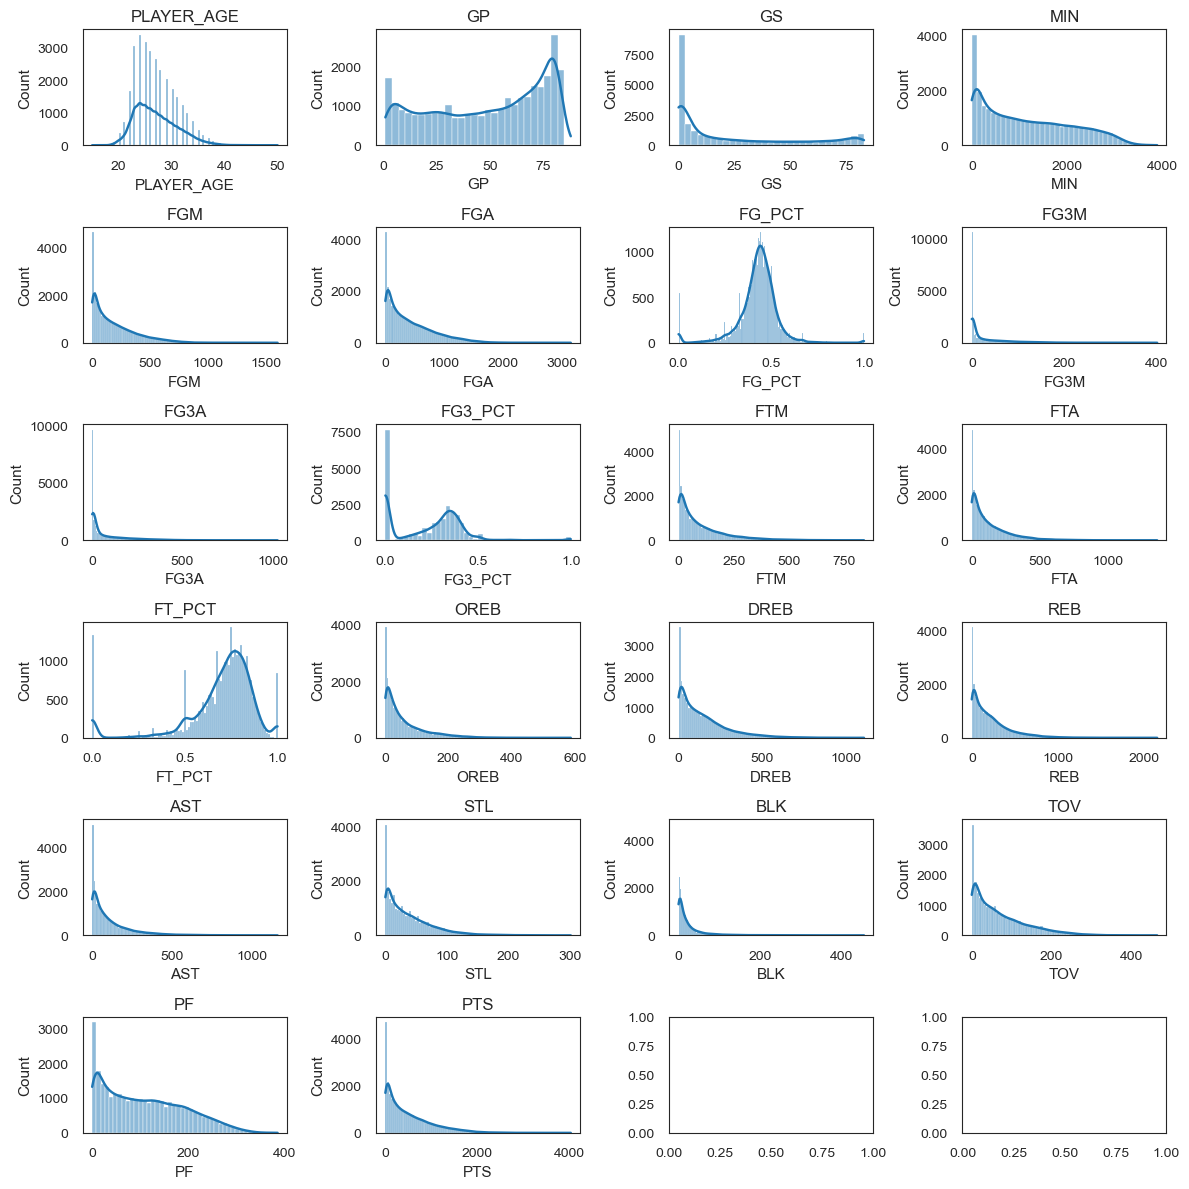

In [132]:
# histograms for each numeric column
fig, axes = plt.subplots(6, 4, figsize=(12, 12))
for ax, column in zip(axes.flatten(), num_vars_player_bs):
    sns.histplot(player_bs_df[column], kde=True, ax=ax) 
    ax.set_title(f'{column}')
plt.tight_layout();

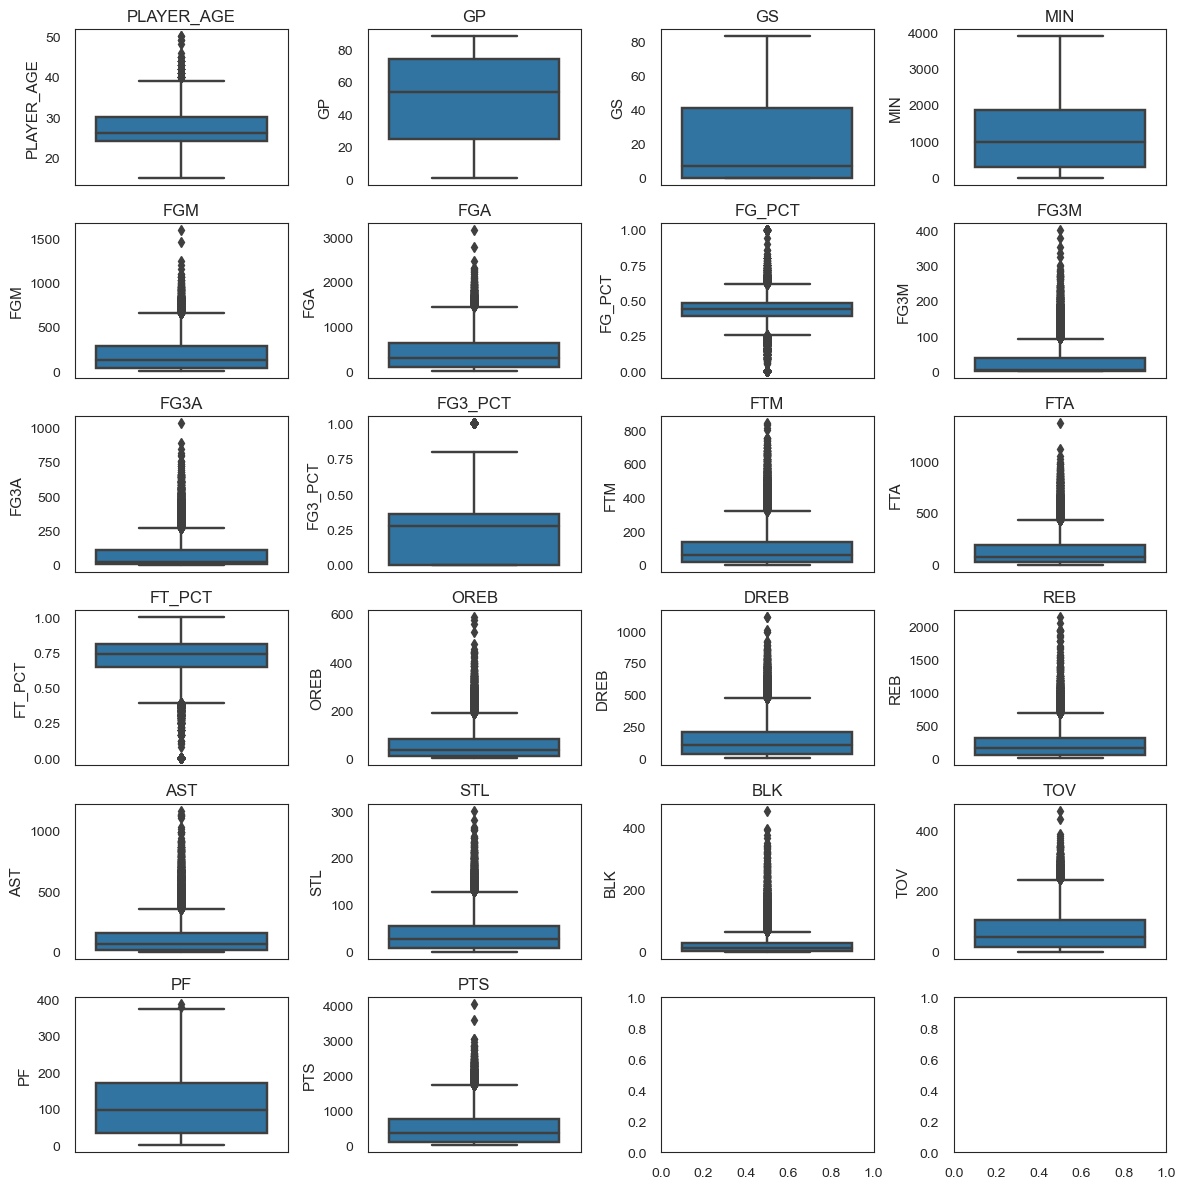

In [134]:
# boxplots for each numeric column
fig, axes = plt.subplots(6, 4, figsize=(12, 12))
for ax, column in zip(axes.flatten(), num_vars_player_bs):
    sns.boxplot(y=column, data=player_bs_df, ax=ax)
    ax.set_title(f'{column}')
plt.tight_layout();

<a name="2.3.-Multivariate-EDA"></a>
## 2.3. Multivariate EDA

[Return to top](#EDA)

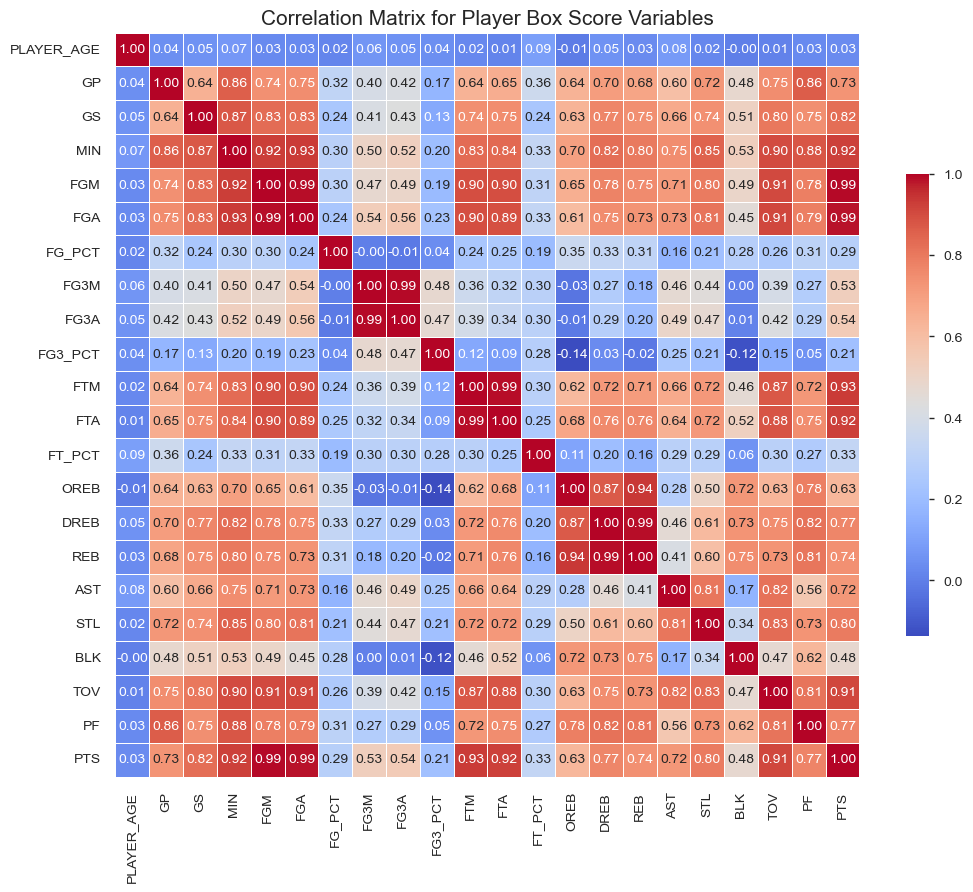

In [135]:
# correlations
plt.figure(figsize=(12, 12))
sns.heatmap(player_bs_df[num_vars_player_bs].corr(), annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for Player Box Score Variables', fontsize=15);